## Loading libraries

In [9]:
import gzip
from statistics import mean, median

import librosa
import librosa.display
import matplotlib.pyplot as plt
%matplotlib inline

import noisereduce as nr
import numpy as np
from AM_downloadDataset import read_data
from mutagen.mp3 import MP3
from tqdm import tqdm

## Loading data 

In [2]:
countries = ["Poland"]

bird = {"gen": "Emberiza", "spec": "Citrinella", "country": countries}

path = (
    "../data/xeno-canto-dataset/"
    + bird["gen"]
    + bird["spec"]
    + "/"
    + bird["country"][0]
)
idData = read_data("id", path)

## Configuration of mel spectograms

In [3]:
N_FFT = 1024  # Number of frequency bins for Fast Fourier Transform
HOP_SIZE = 1024  # Number of audio frames between STFT columns
SR = 44100  # Sampling frequency
N_MELS = 40  # Mel band parameters
WIN_SIZE = 1024  # number of samples in each STFT window
WINDOW_TYPE = "hann"  # the windowin function
FEATURE = "mel"  # feature representation
plt.rcParams["figure.figsize"] = (10, 4)

## Creating 5 sec spectograms with reduced noise

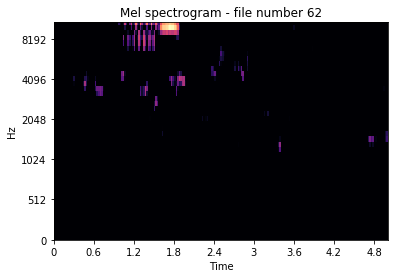

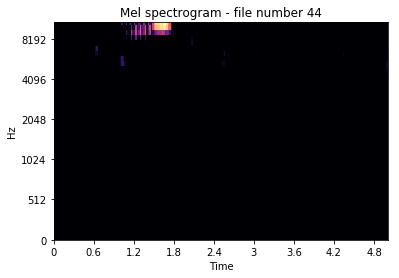

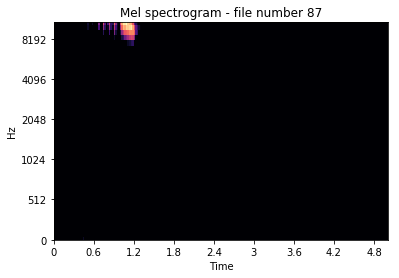

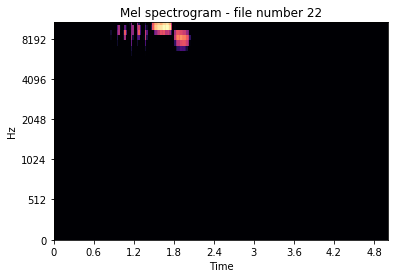

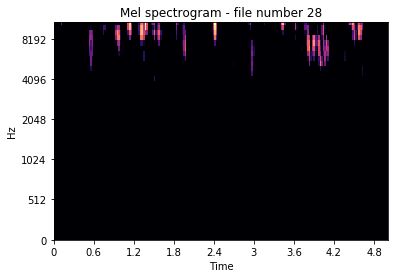

In [10]:
randFiles = [62, 44, 87, 22, 28]
for audioFile in randFiles:
    filePath = path + "/" + bird["gen"] + bird["spec"] + idData[audioFile] + ".mp3"
    y, sr = librosa.load(filePath, duration=10, mono=True)

    # reducing noise
    y = nr.reduce_noise(audio_clip=y, noise_clip=y, prop_decrease=1, verbose=False)

    # creating logmelspec
    logmelspec = librosa.core.amplitude_to_db(
        librosa.feature.melspectrogram(
            y=y,
            S=np.abs(
                librosa.stft(
                    y,
                    n_fft=N_FFT,
                    hop_length=HOP_SIZE,
                    window=WINDOW_TYPE,
                    win_length=WIN_SIZE,
                )
            )
            ** 2,
            sr=SR,
            n_fft=N_FFT,
            hop_length=HOP_SIZE,
            n_mels=N_MELS,
            htk=True,
            fmin=0.0,
            fmax=sr / 2.0,
        ),
        ref=1.0,
    )
    plt.figure()

    # plotting logmelspec
    librosa.display.specshow(
        logmelspec, sr=SR, hop_length=HOP_SIZE, x_axis="time", y_axis="mel"
    )
    plt.title("Mel spectrogram - file number " + str(audioFile))
    plt.show()

    # saving logmelspec
    f = gzip.open(str(audioFile) + ".npy.gznpy.gz", "wb")
    logmelspec.dump(f)
    f.close()

## Creating training dataset 

In [ ]:
hdf5_file = h5py.File(dataset_train.hdf5, mode="w")

X_train = []
y_train = []

for fold in range(1, 9):
    for logmelspec in tqdm(spectograms):
        X_train.append(logmelspec)
        y_train.append(np.squeeze())  ####))  #here to add category

hdf5_file.create_dataset("X_train", X_train)
hdf5_file.create_dataset("y_train", y_train)

## Scaler

In [ ]:
X_train_flat = np.hstack(np.array(X_train)).T
scaler = preprocessing.StandardScaler().fit(X_train_flat)
pickle.dump(scaler, open(scaler_path, "wb"))